In [31]:
# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Modules
import pandas as pd
import numpy as np

In [3]:
# Loading Data
train_data = pd.read_csv("BAJFINANCE.csv")
train_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
# Setting index as date
train_data.set_index("Date", inplace=True)
train_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

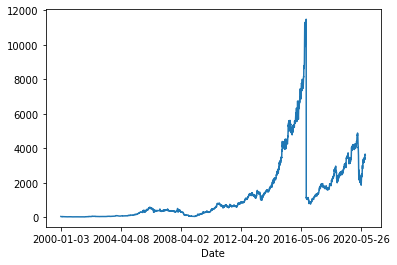

In [6]:
# Plotting VWAP
train_data["VWAP"].plot()

In [7]:
# Finding null values
train_data.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [8]:
# Removing null values
train_data.dropna(inplace=True)
train_data.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
# Copying into new dataframe
data = train_data.copy()
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799


In [10]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [13]:
# Features to calculate mean & std
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
windows = [3,7]

In [14]:
# Calculating mean & std
for feature in lag_features:
    for window in windows:
        data[feature + '_rolling_mean_' + str(window)] = data[feature].rolling(window=window1).mean()
        data[feature + '_rolling_std_' + str(window)] = data[feature].rolling(window=window1).std()
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Volume_rolling_mean_7,Volume_rolling_std_7,Turnover_rolling_mean_3,Turnover_rolling_std_3,Turnover_rolling_mean_7,Turnover_rolling_std_7,Trades_rolling_mean_3,Trades_rolling_std_3,Trades_rolling_mean_7,Trades_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,20363.333333,26980.871860,1.274338e+12,1.685217e+12,1.274338e+12,1.685217e+12,661.000000,670.500559,661.000000,670.500559
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,19880.666667,27352.695339,1.242081e+12,1.710136e+12,1.242081e+12,1.710136e+12,278.333333,148.769396,278.333333,148.769396
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,20954.666667,26391.221653,1.306735e+12,1.652377e+12,1.306735e+12,1.652377e+12,225.333333,78.270897,225.333333,78.270897


In [15]:
# Finding null values
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_rolling_mean_3        2
High_rolling_std_3         2
High_rolling_mean_7        2
High_rolling_std_7         2
Low_rolling_mean_3         2
Low_rolling_std_3          2
Low_rolling_mean_7         2
Low_rolling_std_7          2
Volume_rolling_mean_3      2
Volume_rolling_std_3       2
Volume_rolling_mean_7      2
Volume_rolling_std_7       2
Turnover_rolling_mean_3    2
Turnover_rolling_std_3     2
Turnover_rolling_mean_7    2
Turnover_rolling_std_7     2
Trades_rolling_mean_3      2
Trades_rolling_std_3       2
Trades_rolling_mean_7      2
Trades_rolling_std_7       2
dtype: int64

In [16]:
# Removing null values
data.dropna(inplace=True)
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_rolling_mean_3        0
High_rolling_std_3         0
High_rolling_mean_7        0
High_rolling_std_7         0
Low_rolling_mean_3         0
Low_rolling_std_3          0
Low_rolling_mean_7         0
Low_rolling_std_7          0
Volume_rolling_mean_3      0
Volume_rolling_std_3       0
Volume_rolling_mean_7      0
Volume_rolling_std_7       0
Turnover_rolling_mean_3    0
Turnover_rolling_std_3     0
Turnover_rolling_mean_7    0
Turnover_rolling_std_7     0
Trades_rolling_mean_3      0
Trades_rolling_std_3       0
Trades_rolling_mean_7      0
Trades_rolling_std_7       0
dtype: int64

In [17]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_std_3',
       'High_rolling_mean_7', 'High_rolling_std_7', 'Low_rolling_mean_3',
       'Low_rolling_std_3', 'Low_rolling_mean_7', 'Low_rolling_std_7',
       'Volume_rolling_mean_3', 'Volume_rolling_std_3',
       'Volume_rolling_mean_7', 'Volume_rolling_std_7',
       'Turnover_rolling_mean_3', 'Turnover_rolling_std_3',
       'Turnover_rolling_mean_7', 'Turnover_rolling_std_7',
       'Trades_rolling_mean_3', 'Trades_rolling_std_3',
       'Trades_rolling_mean_7', 'Trades_rolling_std_7'],
      dtype='object')

In [18]:
# Storing std & mean features
ind_features = ['High_rolling_mean_3', 'High_rolling_std_3',
       'High_rolling_mean_7', 'High_rolling_std_7', 'Low_rolling_mean_3',
       'Low_rolling_std_3', 'Low_rolling_mean_7', 'Low_rolling_std_7',
       'Volume_rolling_mean_3', 'Volume_rolling_std_3',
       'Volume_rolling_mean_7', 'Volume_rolling_std_7',
       'Turnover_rolling_mean_3', 'Turnover_rolling_std_3',
       'Turnover_rolling_mean_7', 'Turnover_rolling_std_7',
       'Trades_rolling_mean_3', 'Trades_rolling_std_3',
       'Trades_rolling_mean_7', 'Trades_rolling_std_7']

In [20]:
# Splitting Data
training_data = data[0:1800]
test_data = data[1800:]

In [21]:
# Auto Arima
from pmdarima import auto_arima

In [22]:
# Making Model
model = auto_arima(y=training_data["VWAP"], exogenous=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21076.084, Time=4.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21080.889, Time=1.71 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21074.385, Time=1.72 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21075.155, Time=3.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32772.667, Time=1.72 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=21073.375, Time=2.91 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=21071.355, Time=4.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=21070.654, Time=3.97 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=21071.131, Time=5.73 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=21072.782, Time=7.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=21073.576, Time=5.22 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=21073.306, Time=4.84 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=21069.415, Time=4.36 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=21070.062, Time=3.12 sec
 ARIMA(5,0,0)(0,0,0

In [23]:
# Fitting Model
model.fit(training_data["VWAP"], training_data[ind_features])

ARIMA(order=(4, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

<AxesSubplot:xlabel='Date'>

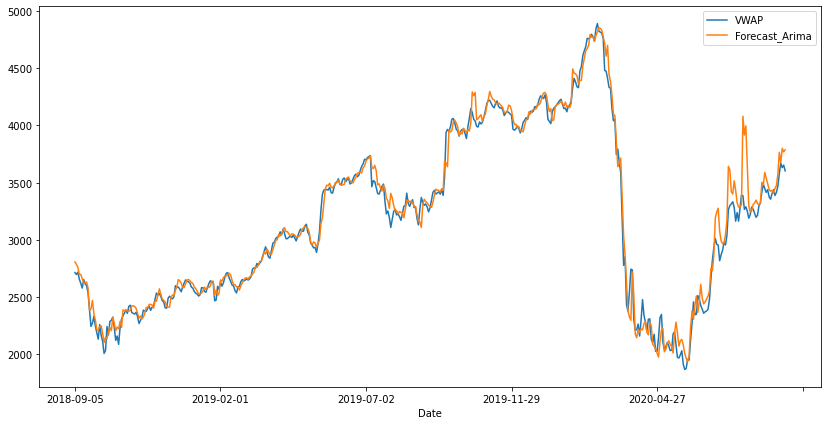

In [32]:
# Predicting
forecast = model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])
test_data["Forecast_Arima"] = forecast
test_data[["VWAP", "Forecast_Arima"]].plot(figsize=(14, 7))